# OVERVIEW OF RELATED STUDIES 


Sharma, Panigrahi and Kumar (2011) explored the application of another modern single classifier consideration in the form of ANN based models within the insurance industry. Their results suggest that the ANN-based approach can help to improve the accuracy of model predictions.  Sabbeh (2018) carried out a review of current ML methods used in the insurance field. The study involved ranking the ML models according to their accuracy. Behavioural data was used, capturing the ever changing variables in line with customer behaviour such as the information they preferred to view on corporate websites, their spending patterns amongst other behavioural traits of customers. The results suggest that RFs had the best accuracy as it outperformed other ML models. This was followed, in order, by the AdaBoost, SGB, and SVM. At the bottom of the model rankings were the NB and the LR models.  

The selection of models also took into consideration another essential factor which is data preparation phase and boosting. Coussement, Lessmann and Verstraeten (2017) carried out a research which compared data preparation algorithms and how they influence the performance of LR models in comparison to more state-of-the-art techniques such as Bayesian network, DT, ANN, NB, RF, and others found out. The results obtained suggest that the LR was able to perform on-par with the advanced techniques, upon a condition that data preparation was done well. Therefore, the researchers concluded that the implementation of LR was preferred as its application is less cumbersome, while on the other hand application of more advanced classifiers does not require data preparation. 

Tamaddoni, Stakhovych and Ewing (2016) investigated the relevance of boosting when carrying out customer churn prediction. The researchers carried out a comparison of the classification performance of the LR, DT and SVM models. The results suggested DTs had the best predictive performance when compared to the other models, upon a condition that adaptive boosting is achieved. However, there was no significant difference between the precision scores of all the methods. 

Vafeiadis et al. (2015) investigated the application of SVM, LR, ANN, DT, and NB with and without boosting. It was not possible to boost LR and NB as these models lacked free parameters for boosting. The most accurate model was the ANN without boosting yet with back propagation while least accurate models were the LR and NB. However, with boosting SVM was the most accurate according to accuracy and F-measure


# FEATURES OF THE DATASET 

Client_data
Contains some personal information on the principal member, such as location, branch and agent code, age etc. 
* Policy_ID - Policy ID for the main member
* NPH_LASTNAME - last name of principle member
* NPH_SEX - sex of principle member
* NPH_BIRTHDATE - birth year of principle member
* NAD_ADDRESS1 - main address of principle member
* NAD_ADDRESS2 - second address of principle member
Payment_history
Contains partial payment history up to the end of 2018, tied to Policy ID. 
* Policy_ID - Policy ID for the main member
* AMOUNTPAID - Amount paid
* DATEPAID - date payment made
* POSTDATE - a cool functionality to have for disussions is for Zindi to be able to pin posts to the top of challenge threads.
* PREMIUMDATE - it states the next date on which the premium should be paid by to keep the policy alive
Policy_data.csv
Describes the policies themselves. There may be multiple rows for each Policy ID since policies can cover more than one person.
* Policy_ID - Policy ID for the main member
* NP2_EFFECTDATE - Date started
* PPR_PRODCD - specifies the product code of product subscribed by the client
* NPR_PREMUIM - Extra premium
* NPH_LASTNAME - last name of member
* CLF_LIFECD - differentiates relationship to principal.   1 principal 2 spouse , 3 child , 4 parent , 5 parent, 6 extended
* NSP_SUBPROPOSAL - unique identifier of a life on a policy on a specific policy we can have the principal as 111  child1 as 222 child2 as 333
* NPR_SUMASSURE - 
* NLO_TYPE - identifies the premium types charged on a policy
* NLO_AMOUNT - amount if there’s an extra charge
* AAG_AGCODE - agent code of the policy agent
* PCL_LOCATCODE - branch code
* OCCUPATION - Job 
* CATEGORY - area of work
train.csv 
Contains a list of all the policies. Policies that lapsed in 2017, 2018 or 2019 are identified with a 1 in the ‘Lapse’ column, and the year is provided. All other columns have a ‘?’ you need to predict if that customer will lapse in 2020. 
* Policy_ID 
* Lapse
* Lapse Year

## 1: IMPORTING LIBRARIES

In [1]:
import pandas as pd 
import numpy as np 
import math
from datetime import datetime
import random

import sklearn 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBClassifier

## 2: IMPORTING THE DATASET 

In [2]:
data = pd.read_csv('data.csv')

The dataset was successfully imported and a dataframe with the name "data" was created. This gave room for exploratory data analysis which was done to gain full understanding of the features of the dataset and relationships among the features. 

## 3: EXPLORATORY DATA ANALYSIS 

Exploratory data analysis (EDA) is the process of exploring the data with the view of gaining knowledgeable insighst from teh data as well as fully understand the behaviour of the features. It also helped in providng the researcher with knowle3dge of the relationship among the features of the dataset and their relationship to the target feature. The following activites were done under EDA.

### a. Inspecting the head and tail of the dataframe 
This was done to gain an appreciation on the first and last five entries of the data. The following codes and their corresponding outcomes were used to inspect the head and tail of the data. 

In [3]:
data.head()

,Unnamed: 0,Policy ID,AAG_AGCODE,PCL_LOCATCODE,OCCUPATION,CATEGORY,count,monthOfPolicy,diffMaxMinDate,BOOLdiffMaxMinDate,...,category_PPR_PRODCD_H6S21FA,category_PPR_PRODCD_ID7TAK9,category_PPR_PRODCD_KOFUYNN,category_PPR_PRODCD_KYXNF1V,category_PPR_PRODCD_OK3TM96,category_PPR_PRODCD_T8ONK55,category_PPR_PRODCD_V6HBYGK,category_PPR_PRODCD_W0F6GK1,category_PPR_PRODCD_XRWHUER,Lapse
0,0,PID_EPZDSP8,AAG_AGCODE_APWOOPE,PCL_LOCATCODE_7SHK7I9,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,10,9,0,0,...,0,0,5,0,0,0,0,0,0,0
1,1,PID_6M6G9IB,AAG_AGCODE_9Z3FBGA,PCL_LOCATCODE_7VFS3EQ,OCCUPATION_IKCIDKW,CATEGORY_R821UZV,2,8,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,PID_UL0F7LH,AAG_AGCODE_Y0LKFF0,PCL_LOCATCODE_SKPRCR4,OCCUPATION_NUJZA7T,CATEGORY_8DALFYO,34,8,273,1,...,0,0,17,0,0,0,0,0,0,0
3,3,PID_TRGUBTU,AAG_AGCODE_1OCF2N0,PCL_LOCATCODE_SPQHMX5,OCCUPATION_W9XA3KX,CATEGORY_LXSLG6M,10,4,0,0,...,0,0,5,0,0,0,0,0,0,0
4,4,PID_TODLPIB,AAG_AGCODE_E31VV8B,PCL_LOCATCODE_0T6GYGX,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,12,12,0,0,...,0,0,6,0,0,0,0,0,0,0


The head shows that the data have 34 features. 

In [4]:
data.tail()

,Unnamed: 0,Policy ID,AAG_AGCODE,PCL_LOCATCODE,OCCUPATION,CATEGORY,count,monthOfPolicy,diffMaxMinDate,BOOLdiffMaxMinDate,...,category_PPR_PRODCD_H6S21FA,category_PPR_PRODCD_ID7TAK9,category_PPR_PRODCD_KOFUYNN,category_PPR_PRODCD_KYXNF1V,category_PPR_PRODCD_OK3TM96,category_PPR_PRODCD_T8ONK55,category_PPR_PRODCD_V6HBYGK,category_PPR_PRODCD_W0F6GK1,category_PPR_PRODCD_XRWHUER,Lapse
51680,51680,PID_P79HFO0,AAG_AGCODE_1ORLV6L,PCL_LOCATCODE_3E1U9QP,OCCUPATION_BEFFLZM,CATEGORY_GWW4FYB,1,8,0,0,...,0,0,0,0,0,1,0,0,0,0
51681,51681,PID_ZJELD8U,AAG_AGCODE_ODZ5MAQ,PCL_LOCATCODE_295LOO6,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0
51682,51682,PID_T3EGL2U,AAG_AGCODE_I1BIXGE,PCL_LOCATCODE_SPQHMX5,OCCUPATION_EIMVIHC,CATEGORY_GWW4FYB,1,11,0,0,...,0,0,0,0,0,1,0,0,0,0
51683,51683,PID_VAI7BV5,AAG_AGCODE_2ZOT2W3,PCL_LOCATCODE_295LOO6,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0
51684,51684,PID_5US8QG7,AAG_AGCODE_L1YVKZO,PCL_LOCATCODE_PEU5TF2,OCCUPATION_IKCIDKW,CATEGORY_R821UZV,1,9,0,0,...,0,0,0,0,0,0,0,1,0,0


The tail shows that the data have 34 features. Both the head and tail of the data shows that there is a feature without a name which duplicates the index feature, this was dropped as part of cleaning the data. 

### b. Dropping feature with no name

In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
data.shape

(51685, 33)

Dropping the unnamed feature which duplicated the index left the dataset with 33 features as shown in result of the dataset shape in the code above.

### c. Checking for null values
Checking for null values was done to identify the features which have missing values so as to correct the error as it creates white noise during the modelling process. The following code was used to check for null values in the data. 

In [7]:
data.isnull().sum()

Policy ID                      0
AAG_AGCODE                     0
PCL_LOCATCODE                  0
OCCUPATION                     0
CATEGORY                       0
count                          0
monthOfPolicy                  0
diffMaxMinDate                 0
BOOLdiffMaxMinDate             0
category_NLO_TYPE_4V30T9N      0
category_NLO_TYPE_DPBHSAH      0
category_NLO_TYPE_T3W5UZB      0
category_NLO_TYPE_XAJI0Y6      0
category_NLO_TYPE_XTHV3A3      0
category_NLO_TYPE_ZMF8MDD      0
category_PPR_PRODCD_165U4LY    0
category_PPR_PRODCD_64QNIHM    0
category_PPR_PRODCD_6J9HUC7    0
category_PPR_PRODCD_8ZHO2CE    0
category_PPR_PRODCD_APTRA9E    0
category_PPR_PRODCD_B2KVCE7    0
category_PPR_PRODCD_EJ7YKFV    0
category_PPR_PRODCD_GLE2MHV    0
category_PPR_PRODCD_H6S21FA    0
category_PPR_PRODCD_ID7TAK9    0
category_PPR_PRODCD_KOFUYNN    0
category_PPR_PRODCD_KYXNF1V    0
category_PPR_PRODCD_OK3TM96    0
category_PPR_PRODCD_T8ONK55    0
category_PPR_PRODCD_V6HBYGK    0
category_P

The result shows that there are no missing values in the data since the sum of null values per each feature is 0 throughout all the features of the dataset.

### d. Checking for unique values

Checking for unique values was done to understand the unique observations per each feature. This was done using the following code.

In [8]:
data.nunique()

Policy ID                      51685
AAG_AGCODE                       585
PCL_LOCATCODE                     15
OCCUPATION                       221
CATEGORY                           6
count                             66
monthOfPolicy                     12
diffMaxMinDate                   122
BOOLdiffMaxMinDate                 2
category_NLO_TYPE_4V30T9N          5
category_NLO_TYPE_DPBHSAH         67
category_NLO_TYPE_T3W5UZB          5
category_NLO_TYPE_XAJI0Y6         21
category_NLO_TYPE_XTHV3A3          5
category_NLO_TYPE_ZMF8MDD          5
category_PPR_PRODCD_165U4LY       20
category_PPR_PRODCD_64QNIHM        6
category_PPR_PRODCD_6J9HUC7        4
category_PPR_PRODCD_8ZHO2CE        3
category_PPR_PRODCD_APTRA9E       15
category_PPR_PRODCD_B2KVCE7       40
category_PPR_PRODCD_EJ7YKFV        5
category_PPR_PRODCD_GLE2MHV       12
category_PPR_PRODCD_H6S21FA        3
category_PPR_PRODCD_ID7TAK9        3
category_PPR_PRODCD_KOFUYNN       43
category_PPR_PRODCD_KYXNF1V        3
c

The results show that the Policy ID is unique per each entry while the BOOLdiffMaxMinDate and Lapse features have two unique observations. The two unique observations on the laspse feature which is also the target feature shows that teh feature have a binary class which qualifies for a calssification prediction. The 51685 unique observations on the Policy ID feature shows that there were no duplicate entries in the data with respect to the subscriers as identified by their Policy ID which is unqiue per every subscriber.   

### e. Checking for data information 

This function summarises the details of the data in terms of its index, number of features, non-null count as well as data type. The following code was used to check the information of the data.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51685 entries, 0 to 51684
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Policy ID                    51685 non-null  object
 1   AAG_AGCODE                   51685 non-null  object
 2   PCL_LOCATCODE                51685 non-null  object
 3   OCCUPATION                   51685 non-null  object
 4   CATEGORY                     51685 non-null  object
 5   count                        51685 non-null  int64 
 6   monthOfPolicy                51685 non-null  int64 
 7   diffMaxMinDate               51685 non-null  int64 
 8   BOOLdiffMaxMinDate           51685 non-null  int64 
 9   category_NLO_TYPE_4V30T9N    51685 non-null  int64 
 10  category_NLO_TYPE_DPBHSAH    51685 non-null  int64 
 11  category_NLO_TYPE_T3W5UZB    51685 non-null  int64 
 12  category_NLO_TYPE_XAJI0Y6    51685 non-null  int64 
 13  category_NLO_TYPE_XTHV3A3    51

The outcome shows that the data have 51685 entries indexed from 0 to 51684 of which non of the entries have null values. Five of the features have object data types, these are, Policy ID,
AAG_AGCODE, PCL_LOCATCODE, OCCUPATION and CATEGORY which the rest have integer data types. The object data types need to be converted to integer data types which will be done using lable encoding.  

### f. Plotting the features on a Histogram

Plotting the features on a histogram provides a visual understanding of the feature distribution. This was done using the following code. 

array([[<AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'monthOfPolicy'}>,
        <AxesSubplot:title={'center':'diffMaxMinDate'}>,
        <AxesSubplot:title={'center':'BOOLdiffMaxMinDate'}>,
        <AxesSubplot:title={'center':'category_NLO_TYPE_4V30T9N'}>],
       [<AxesSubplot:title={'center':'category_NLO_TYPE_DPBHSAH'}>,
        <AxesSubplot:title={'center':'category_NLO_TYPE_T3W5UZB'}>,
        <AxesSubplot:title={'center':'category_NLO_TYPE_XAJI0Y6'}>,
        <AxesSubplot:title={'center':'category_NLO_TYPE_XTHV3A3'}>,
        <AxesSubplot:title={'center':'category_NLO_TYPE_ZMF8MDD'}>],
       [<AxesSubplot:title={'center':'category_PPR_PRODCD_165U4LY'}>,
        <AxesSubplot:title={'center':'category_PPR_PRODCD_64QNIHM'}>,
        <AxesSubplot:title={'center':'category_PPR_PRODCD_6J9HUC7'}>,
        <AxesSubplot:title={'center':'category_PPR_PRODCD_8ZHO2CE'}>,
        <AxesSubplot:title={'center':'category_PPR_PRODCD_APTRA9E'}>],
       [<AxesSubp

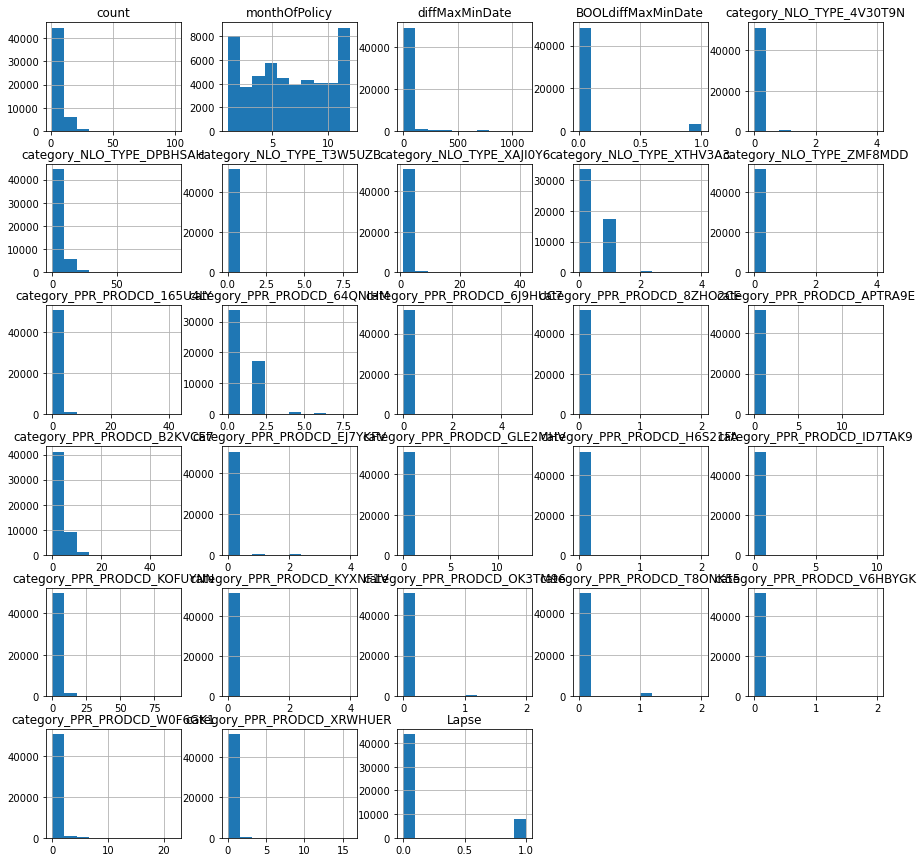

In [10]:
data.hist(figsize=(15,15))

### g. Descriptive statistics of the data

Descriptive statistics shows the summary of the data in terms of its statistical distribution in terms of teh count, mean, standard deviation, minimum value, maximum value, 25% of teh data, 50% of the data, 75% of the data and maximum value per each feature. The data.describe function was used to show the descriptive statistics of the data.

In [11]:
data.describe()

,count,monthOfPolicy,diffMaxMinDate,BOOLdiffMaxMinDate,category_NLO_TYPE_4V30T9N,category_NLO_TYPE_DPBHSAH,category_NLO_TYPE_T3W5UZB,category_NLO_TYPE_XAJI0Y6,category_NLO_TYPE_XTHV3A3,category_NLO_TYPE_ZMF8MDD,...,category_PPR_PRODCD_H6S21FA,category_PPR_PRODCD_ID7TAK9,category_PPR_PRODCD_KOFUYNN,category_PPR_PRODCD_KYXNF1V,category_PPR_PRODCD_OK3TM96,category_PPR_PRODCD_T8ONK55,category_PPR_PRODCD_V6HBYGK,category_PPR_PRODCD_W0F6GK1,category_PPR_PRODCD_XRWHUER,Lapse
count,51685.000000,51685.000000,51685.000000,51685.000000,51685.000000,51685.000000,51685.000000,51685.000000,51685.000000,51685.000000,...,51685.000000,51685.000000,51685.000000,51685.000000,51685.000000,51685.000000,51685.000000,51685.000000,51685.000000,51685.000000
mean,5.397852,6.514656,18.695714,0.063906,0.008262,3.673426,0.001606,1.346213,0.365657,0.002689,...,0.002593,0.000290,2.084822,0.000097,0.019058,0.036123,0.000213,0.152675,0.025694,0.154358
std,5.611876,3.420293,96.688280,0.244588,0.099868,5.807889,0.070772,1.098920,0.520690,0.061049,...,0.053086,0.049178,3.235375,0.018136,0.140911,0.187322,0.017035,0.746846,0.251759,0.361295
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,9.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,12.000000,1126.000000,1.000000,4.000000,95.000000,8.000000,42.000000,4.000000,4.000000,...,2.000000,10.000000,90.000000,4.000000,2.000000,2.000000,2.000000,22.000000,16.000000,1.000000


The summary statistics of the dataset are provided in terms of the count, mean, standard deviation, minimum value, 25% value, median, 75% value and the maximum value in the dataset per each feature. The extreme variations in the feature maximum and minimum values such as the NLO_AMOUNT suggests a wide range of data which needs to be dealt with so as to scale the data.

### h. Visualising the features 

The features 'CATEGORY' and 'LAPSE' were visualised using bar graph and pie chart respectively as follows.

C:\Users\Admin\Anaconda3\envs\shleys\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'CATEGORY')

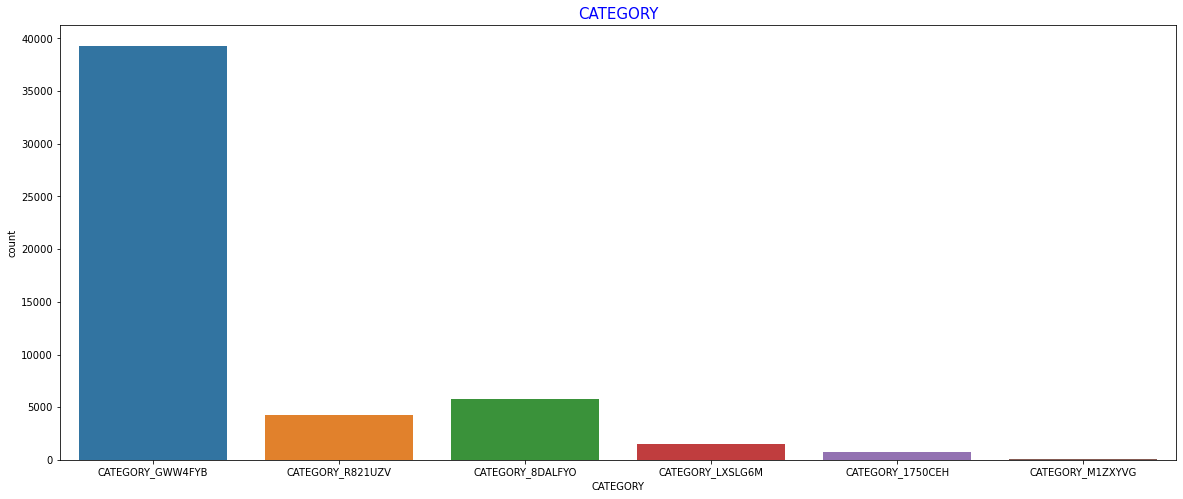

In [12]:
plt.figure(figsize=(20,8))
sns.countplot(data.CATEGORY)
plt.title("CATEGORY",color = 'blue',fontsize=15)

The dominating category is 'CATEGORY_GWW4YB' followed by 'CATEGORY_GWW4YB8DALFYO' while 'CATEGORY_mizxyvg'is less frequent.

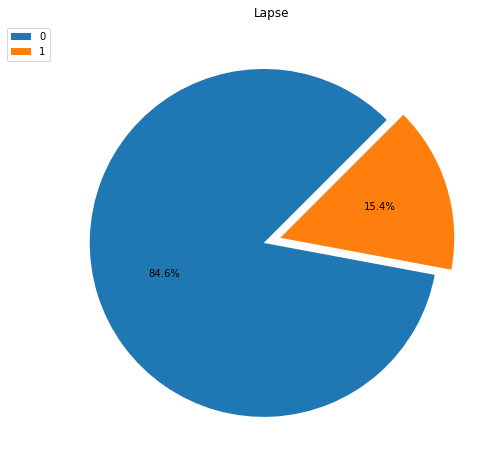

In [13]:
plt.figure(figsize=(20,8))
plt.pie(data['Lapse'].value_counts(),startangle=45,autopct='%1.1f%%',explode=[0.05]*2)
plt.legend(data['Lapse'].unique(),bbox_to_anchor=(0.00,1))
plt.title('Lapse')
plt.savefig('Lapse.png')

The Pie chart above shows that subscribers whose policy lapsed are fewer (15.4%) than those whose policy is still valid (84.6%) suggesting that the dataset is biased towards active policies at the expense of inactive policies.

### i. Encoding the data

This was done to ensure all features with object data types are converted to integer data types so that they can be used for correlation analysis as well as input features during model training. The following code was used to encode the data.

In [14]:
from sklearn.preprocessing import LabelEncoder
LabelEncoding= LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col]= LabelEncoding.fit_transform(data[col])

### j. Feature correlation 

This shows the relatioship among features so as to create a basis upon which multi-collinearities can be dealt with. Multi-collinearities are an undesirable feature relationship that exists between predictors such that it causes a duplicated influence by the related features on the predicted feature. A heatmap was used to check for feature correlation as follows.

In [15]:
correlation_mat = data.corr()

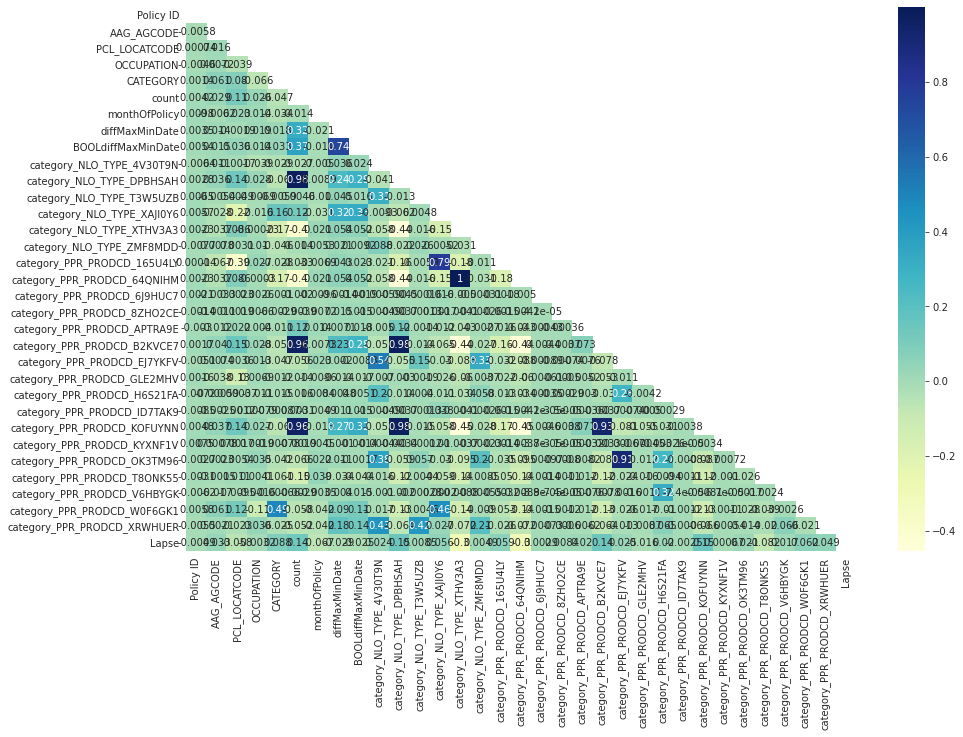

In [16]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    #f, ax = plt.subplots(figsize=(7,6))
    f, ax = plt.subplots(figsize=(15,10))
    ax = sns.heatmap(correlation_mat,
mask=mask,annot=True,cmap="YlGnBu")

## 4: FEATURE ENGINEERING

The following activities were done under feature engineering.

### a. Defining the input and output features of the dataset 

This code used to slice the data and define the predictors which are the X-input features of the model. These composed of all the other features less the target feature which is the last feature of the dataset.


In [17]:
x = data.values[:,0:32]
x

array([[20860,   181,     5, ...,     0,     0,     0],
       [ 9370,   170,     6, ...,     0,     0,     0],
       [43866,   550,    12, ...,     0,     0,     0],
       ...,
       [41691,   280,    13, ...,     0,     0,     0],
       [44835,    54,     2, ...,     0,     0,     0],
       [ 8277,   343,    10, ...,     0,     1,     0]], dtype=int64)

In [18]:
x.shape

(51685, 32)

In [19]:
# The outcome shows that the input feature is composed of 51685 entries and 32 features. 

### b. Defining the output/target/y-predict feature

To define the target feature, the following code was used. 

In [20]:
y = data.values[:,-1]
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
y.shape

(51685,)

### c Scaling the data 

Scaling the data was done using the standard scaler. This was done to normalise the date.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
Feature_Scaling = StandardScaler()

In [24]:
x_scaled = Feature_Scaling.fit_transform(x)
x_scaled

array([[-0.33391031, -0.69872086, -0.7351573 , ..., -0.01249392,
        -0.20442815, -0.10205915],
       [-1.10400855, -0.76621185, -0.47253579, ..., -0.01249392,
        -0.20442815, -0.10205915],
       [ 1.20802878,  1.5652952 ,  1.10319326, ..., -0.01249392,
        -0.20442815, -0.10205915],
       ...,
       [ 1.062253  , -0.09130192,  1.36581477, ..., -0.01249392,
        -0.20442815, -0.10205915],
       [ 1.2729744 , -1.47793506, -1.52302183, ..., -0.01249392,
        -0.20442815, -0.10205915],
       [-1.17726506,  0.29523741,  0.57795024, ..., -0.01249392,
         1.13454903, -0.10205915]])

### Splitting the data into training and testing sets 

Splitting the data was done to form the traning and testing sets for use during the model training and model testing process. This was done using a ratio of 20% for testing and 80% for training and a random state of 50 entries. The following code was used to split the data. 

In [25]:
x_train,x_test,y_train,y_test=train_test_split (x_scaled,y,test_size=0.2,random_state=50)

In [26]:
x_test.shape

(10337, 32)

In [27]:
y_test.shape

(10337,)

In [28]:
x_train.shape

(41348, 32)

In [29]:
y_train.shape

(41348,)

## 5: MODEL BUIDLING 

A neuaral netrowk with 2 hidden layers of 50 neurons each was developed using the following code. Building the model was done using the following activities: 

### a. Creating the model

In [30]:
model = tf.keras.models.Sequential()## create a model 
model.add(tf.keras.layers.Dense(50,input_dim=32,activation='relu'))## create a hidden layer with 50 neurons with 11 features
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [31]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1650      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 6,801
Trainable params: 6,801
Non-trainable params: 0
_________________________________________________________________
None


### b. Compiling the Model

In [32]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### c. Defining the model checkpoint

In [33]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("Policy Lapse Predictor.h5", 
                                                monitor='val_acc', 
                                                verbose=1, 
                                                save_best_only=True, 
                                                save_weights_only=False,
                                                mode='auto',
                                                period=1)
#checking performance every epoch

### d. Saving the output image files using tensorboard

In [34]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='tb_logs', 
                                             histogram_freq=1,
                                             write_graph=True, 
                                             write_images=True)

### e. Fitting the model

The model was initially trained using 100 epochs with a batch size of 50 and a validation split of 20%. 

In [35]:
history=model.fit(x_train,y_train,
                  epochs=100,
                  batch_size=50,
                  verbose=1,
                  validation_split=0.2)

Epoch 1/100
662/662 [==============================] - 5s 2ms/step - loss: 0.3548 - accuracy: 0.8441 - val_loss: 0.3409 - val_accuracy: 0.8433
Epoch 2/100
662/662 [==============================] - 1s 2ms/step - loss: 0.3390 - accuracy: 0.8469 - val_loss: 0.3417 - val_accuracy: 0.8457
Epoch 3/100
662/662 [==============================] - 1s 2ms/step - loss: 0.3363 - accuracy: 0.8475 - val_loss: 0.3390 - val_accuracy: 0.8469
Epoch 4/100
662/662 [==============================] - 1s 2ms/step - loss: 0.3351 - accuracy: 0.8482 - val_loss: 0.3385 - val_accuracy: 0.8473
Epoch 5/100
662/662 [==============================] - 1s 2ms/step - loss: 0.3334 - accuracy: 0.8490 - val_loss: 0.3377 - val_accuracy: 0.8473
Epoch 6/100
662/662 [==============================] - 1s 2ms/step - loss: 0.3318 - accuracy: 0.8491 - val_loss: 0.3371 - val_accuracy: 0.8468
Epoch 7/100
662/662 [==============================] - 1s 2ms/step - loss: 0.3306 - accuracy: 0.8494 - val_loss: 0.3370 - val_accuracy: 0.8467

Epoch 58/100
662/662 [==============================] - 1s 2ms/step - loss: 0.2907 - accuracy: 0.8651 - val_loss: 0.3736 - val_accuracy: 0.8398
Epoch 59/100
662/662 [==============================] - 1s 2ms/step - loss: 0.2891 - accuracy: 0.8672 - val_loss: 0.3714 - val_accuracy: 0.8375
Epoch 60/100
662/662 [==============================] - 1s 2ms/step - loss: 0.2890 - accuracy: 0.8661 - val_loss: 0.3683 - val_accuracy: 0.8334
Epoch 61/100
662/662 [==============================] - 1s 2ms/step - loss: 0.2882 - accuracy: 0.8653 - val_loss: 0.3738 - val_accuracy: 0.8377
Epoch 62/100
662/662 [==============================] - 1s 2ms/step - loss: 0.2866 - accuracy: 0.8679 - val_loss: 0.3717 - val_accuracy: 0.8342
Epoch 63/100
662/662 [==============================] - 1s 2ms/step - loss: 0.2863 - accuracy: 0.8676 - val_loss: 0.3835 - val_accuracy: 0.8400
Epoch 64/100
662/662 [==============================] - 1s 2ms/step - loss: 0.2872 - accuracy: 0.8678 - val_loss: 0.3843 - val_accuracy:

### f. Visualising model peformance

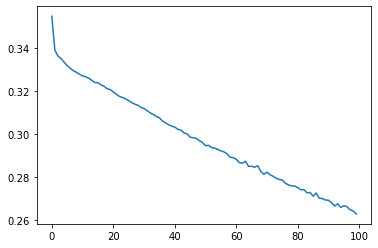

In [36]:
# Visualising loss of the model

plt.plot(history.history['loss'])

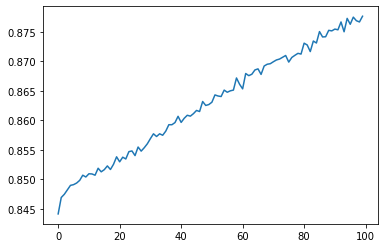

In [37]:
# Visualising accuracy of the model

plt.plot(history.history['accuracy'])

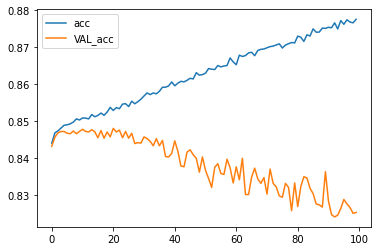

In [38]:
# Co-plotting accuracy and validation accuracy of the model on the same axis

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='VAL_acc')
plt.legend()

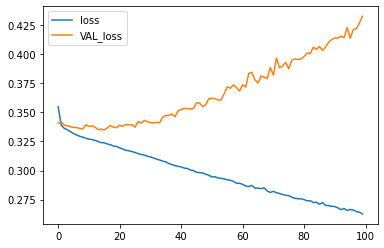

In [39]:
# Co-plotting loss and validation loss of the model on the same axis

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='VAL_loss')
plt.legend()

## 6: EVALUATING THE MODEL

In [40]:
model.evaluate(x_train,y_train)

1293/1293 [==============================] - 2s 2ms/step - loss: 0.2903 - accuracy: 0.8707: 0s - loss: 0.2704 - accura


[0.29034021496772766, 0.8707071542739868]

In [41]:
p=model.predict_classes(x_test)
p

C:\Users\Admin\Anaconda3\envs\shleys\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [42]:
from sklearn import metrics

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,p))
print("Accuracy:",metrics.accuracy_score(y_test, p))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8763
           1       0.37      0.17      0.24      1574

    accuracy                           0.83     10337
   macro avg       0.62      0.56      0.57     10337
weighted avg       0.79      0.83      0.80     10337

Accuracy: 0.8291573957627938


The peformance metrics of the model show that the model had a precision of 87% on predicting 0 classess and 39% on predicting 1 classes, the recall score of the model is 94% on 0 classes and 19% on 1 classes, F1-score is 90% on 0 classes and 26% on 1 classes while teh overal accuracy of the model is 83%. The model have a potential of improving its peformance if the parameters of the model are adjusted. Teh following section therefore performed hyper-parameter tuning of the model and also trained the model with tuned parameters to check if the peformance have improved before deciding on the model to retain.

## 7: HYPERPARAMETER TUNING

Hyperparameter tuning is the process of adjusting the parameters of a model so as to positively influence its peformance. The following was done to tune the parameters of teh model:
    
a. Increased the density of the neural network from 2 hidden layers to 7 hidden layers. 

b. Increased the number of neurons per each layer from 50 neurons to 100 neurons.

c. Introduced EarlyStopping which monitored the model peformance using its validation accuracy ('val_acc')

d. Reduced the batch size from 50 to 10


In [44]:
model = tf.keras.models.Sequential()## create a model 
model.add(tf.keras.layers.Dense(500,input_dim=32,activation='relu'))## create a hidden layer with 50 neurons with 11 features
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [45]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               16500     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 100)              

In [46]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("Policy Lapse Predictor.h5", 
                                                monitor='val_acc', 
                                                verbose=1, 
                                                save_best_only=True, 
                                                save_weights_only=False,
                                                mode='auto',
                                                period=1)
# checking performance every epoch

In [48]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            min_delta=0,
                                            patience=10,
                                            verbose=1,
                                            mode='auto')

In [49]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='tb_logs', 
                                             histogram_freq=1,
                                             write_graph=True, 
                                             write_images=True)

### Fitting the adjusted model

In [50]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=1000, 
                    batch_size=2,  
                    verbose=1, 
                    validation_split=0.2,
                    callbacks=[checkpoint, earlystop, tensorboard])

Epoch 1/1000
16539/16539 [==============================] - 43s 2ms/step - loss: 0.3567 - accuracy: 0.8455 - val_loss: 0.3563 - val_accuracy: 0.8434
Epoch 2/1000
16539/16539 [==============================] - 37s 2ms/step - loss: 0.3512 - accuracy: 0.8455 - val_loss: 0.3472 - val_accuracy: 0.8434
Epoch 3/1000
16539/16539 [==============================] - 47s 3ms/step - loss: 0.3509 - accuracy: 0.8454 - val_loss: 0.3647 - val_accuracy: 0.8434
Epoch 4/1000
16539/16539 [==============================] - 39s 2ms/step - loss: 0.3472 - accuracy: 0.8462 - val_loss: 0.3414 - val_accuracy: 0.8438
Epoch 5/1000
16539/16539 [==============================] - 39s 2ms/step - loss: 0.3448 - accuracy: 0.8466 - val_loss: 0.3418 - val_accuracy: 0.8433
Epoch 6/1000
16539/16539 [==============================] - 40s 2ms/step - loss: 0.3482 - accuracy: 0.8462 - val_loss: 0.3487 - val_accuracy: 0.8434
Epoch 7/1000
16539/16539 [==============================] - 40s 2ms/step - loss: 0.3778 - accuracy: 0.8459

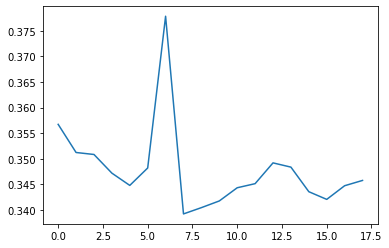

In [51]:
plt.plot(history.history['loss'])

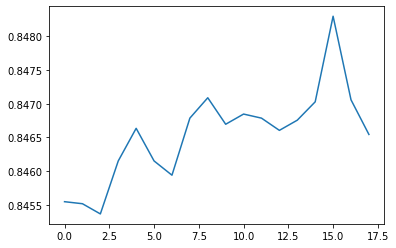

In [52]:
plt.plot(history.history['accuracy'])

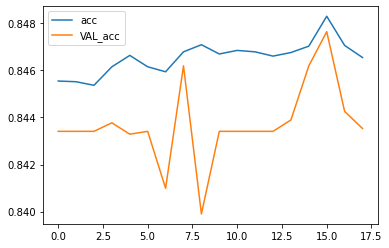

In [53]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='VAL_acc')
plt.legend()

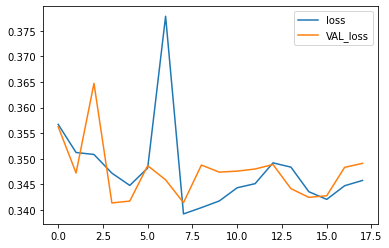

In [54]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='VAL_loss')
plt.legend()

In [55]:
### Evaluating the adjusted model 

In [56]:
model.evaluate(x_train,y_train)

1293/1293 [==============================] - 3s 2ms/step - loss: 0.3465 - accuracy: 0.8458


[0.34646451473236084, 0.8458450436592102]

In [57]:
p=model.predict_classes(x_test)
p

C:\Users\Admin\Anaconda3\envs\shleys\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [58]:
from sklearn import metrics

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,p))
print("Accuracy:",metrics.accuracy_score(y_test, p))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8763
           1       0.33      0.00      0.01      1574

    accuracy                           0.85     10337
   macro avg       0.59      0.50      0.46     10337
weighted avg       0.77      0.85      0.78     10337

Accuracy: 0.8473444906646029


# ANALYSIS OF RESULTS

Results of the model after hyper-parameter tuning show that there was an improvement in the peformance metrics of the model such that, the overal accuracy of the model improved from 0.83 (83%) to 0.85 (85%). he study found that customer’s churn is mainly due to increases in the premium charges of policies. The study discovered that customers decide to churn mostly when the premium charges ae increased. Therefore, the policy designers should take note that customers in the life assurance market are sensitive to charges and ensure other mechanisms are adopted to address the price sensitivity of customers which might lead to them churning from the products. 

# CONCLUSION

The study concludes that the supervised machine learning is effective in predicting customer churn through the use of artificial neural networks. It can be concluded that insurance premiums have a impact on the probability of churners such that, the higher the premium, the higher the churners and the lower the premiums - the lower the churn rate. Insurance companies should therefore maintain low premiums and capitalise on increased subscriber base to retain larger subscriptions and subsequently higher profitability.



# REFERENCES

Ahmad, A. K., Jafar, A., & Aljoumaa, K. (2019). Customer churn prediction in telecom using machine learning in big data platform. Journal of Big Data, 6(1), 1-24.

Amin, A., Al-Obeidat, F., Shah, B., Adnan, A., Loo, J., & Anwar, S. (2019). Customer churn prediction in telecommunication industry using data certainty. Journal of Business Research, 94, 290-301. 

Larsson, A., & Broström, E. (2019). Ensuring customer retention: insurers’ perception of customer loyalty. Marketing Intelligence & Planning.

Shirazi, F., & Mohammadi, M. (2019). A big data analytics model for customer churn prediction in the retiree segment. International Journal of Information Management, 48, 238-253.


